In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read in data 
transactions = pd.read_csv('../data/transactions_train.csv')
customers = pd.read_csv('../data/customers.csv')
articles = pd.read_csv('../data/articles.csv')

In [7]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [8]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [9]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [11]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB
None


In [12]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB
None


In [13]:
print(articles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

## TRANSACTIONS

In [15]:
# Min and max of transaction date to get an idea of our date range
print("Min transaction date:", transactions['t_dat'].min())
print("Max transaction date:", transactions['t_dat'].max())

Min transaction date: 2018-09-20 00:00:00
Max transaction date: 2020-09-22 00:00:00


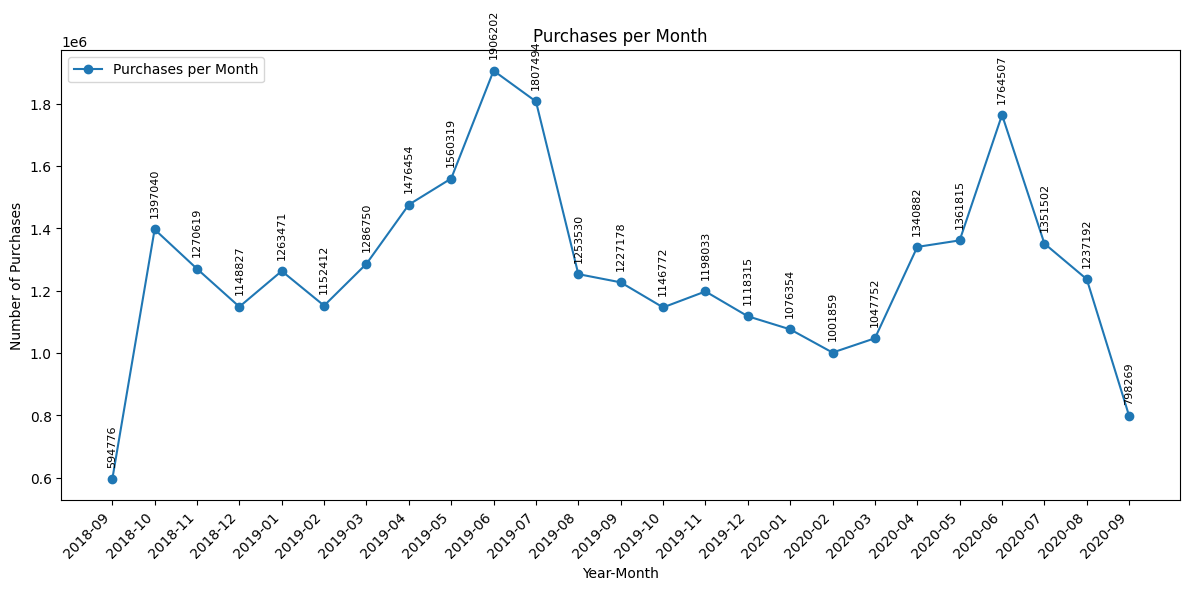

In [18]:
# Ensure transaction dates are parsed
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

# Create a year-month column for monthly grouping
transactions['year_month'] = transactions['t_dat'].dt.to_period('M')

# Count purchases per month
monthly = transactions.groupby('year_month').size()

# Convert PeriodIndex to string for plotting
monthly.index = monthly.index.astype(str)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly.index, monthly.values, marker='o', label='Purchases per Month')

# Annotate each point with value
for i, (x, y) in enumerate(zip(monthly.index, monthly.values)):
    ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, rotation=90)

plt.title('Purchases per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

In [19]:
# Recency, frequency, and monetary value (RFM) analysis
# monetary = revenue
# we will see number of purchases / total revenue / min purchase date / max purchase date for each customer

rfm = transactions.groupby('customer_id').agg({
    't_dat': ['min', 'max', 'count'],
    'price': 'sum'
}).reset_index()

In [20]:
rfm.head()

customer_id      t_dat             \
                                                            min        max   
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3... 2018-12-27 2020-09-05   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e... 2018-09-21 2020-07-08   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca... 2018-09-20 2020-09-15   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2... 2019-06-09 2019-06-09   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f... 2018-10-12 2020-08-12   

            price  
  count       sum  
0    21  0.648983  
1    86  2.601932  
2    18  0.704780  
3     2  0.060983  
4    13  0.469695

In [21]:
rfm.columns = ['customer_id', 'first_purchase', 'last_purchase', 'frequency', 'revenue']
rfm['recency'] = (transactions['t_dat'].max() - rfm['last_purchase']).dt.days
print(rfm.describe())

                      first_purchase                  last_purchase  \
count                        1362281                        1362281   
mean   2019-05-02 11:03:35.778389760  2020-01-30 20:26:15.037162240   
min              2018-09-20 00:00:00            2018-09-20 00:00:00   
25%              2018-10-29 00:00:00            2019-08-21 00:00:00   
50%              2019-02-16 00:00:00            2020-04-24 00:00:00   
75%              2019-10-03 00:00:00            2020-08-05 00:00:00   
max              2020-09-22 00:00:00            2020-09-22 00:00:00   
std                              NaN                            NaN   

          frequency       revenue       recency  
count  1.362281e+06  1.362281e+06  1.362281e+06  
mean   2.333463e+01  6.493858e-01  2.351484e+02  
min    1.000000e+00  7.627119e-04  0.000000e+00  
25%    3.000000e+00  8.806780e-02  4.800000e+01  
50%    9.000000e+00  2.455932e-01  1.510000e+02  
75%    2.700000e+01  7.011864e-01  3.980000e+02  
max    1.8

In [22]:
rfm.head()

,customer_id,first_purchase,last_purchase,frequency,revenue,recency
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2018-12-27,2020-09-05,21,0.648983,17
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2018-09-21,2020-07-08,86,2.601932,76
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2018-09-20,2020-09-15,18,0.704780,7
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2019-06-09,2019-06-09,2,0.060983,471
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,2018-10-12,2020-08-12,13,0.469695,41


- Recency shows how long back did the customer make their last purchase
- Smaller the value of recency = the customer has been active recently

In [23]:
rfm[['recency', 'frequency', 'revenue']].corr()

,recency,frequency,revenue
recency,1.000000,-0.358451,-0.330342
frequency,-0.358451,1.000000,0.958672
revenue,-0.330342,0.958672,1.000000


- This correlation makes sense : High value of recency (i.e, customer has not been active off late) correlated with lower bvalues for revenue and frequncy
- frequency and revenue are positively correlated to each other

In [24]:
rfm['recency_quartile'] = pd.qcut(rfm['recency'], 4, ['1=Best','2','3','4=Least recent'])
rfm['frequency_quartile'] = pd.qcut(rfm['frequency'], 4, ['4=Most often','3','2','1=Least often'])
rfm['revenue_quartile'] = pd.qcut(rfm['revenue'], 4, ['4=Biggest spend','3','2','1=Least spend'])


In [25]:
rfm.head()

,customer_id,first_purchase,last_purchase,frequency,revenue,recency,recency_quartile,frequency_quartile,revenue_quartile
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2018-12-27,2020-09-05,21,0.648983,17,1=Best,2,2
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2018-09-21,2020-07-08,86,2.601932,76,2,1=Least often,1=Least spend
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2018-09-20,2020-09-15,18,0.704780,7,1=Best,2,1=Least spend
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2019-06-09,2019-06-09,2,0.060983,471,4=Least recent,4=Most often,4=Biggest spend
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,2018-10-12,2020-08-12,13,0.469695,41,1=Best,2,2


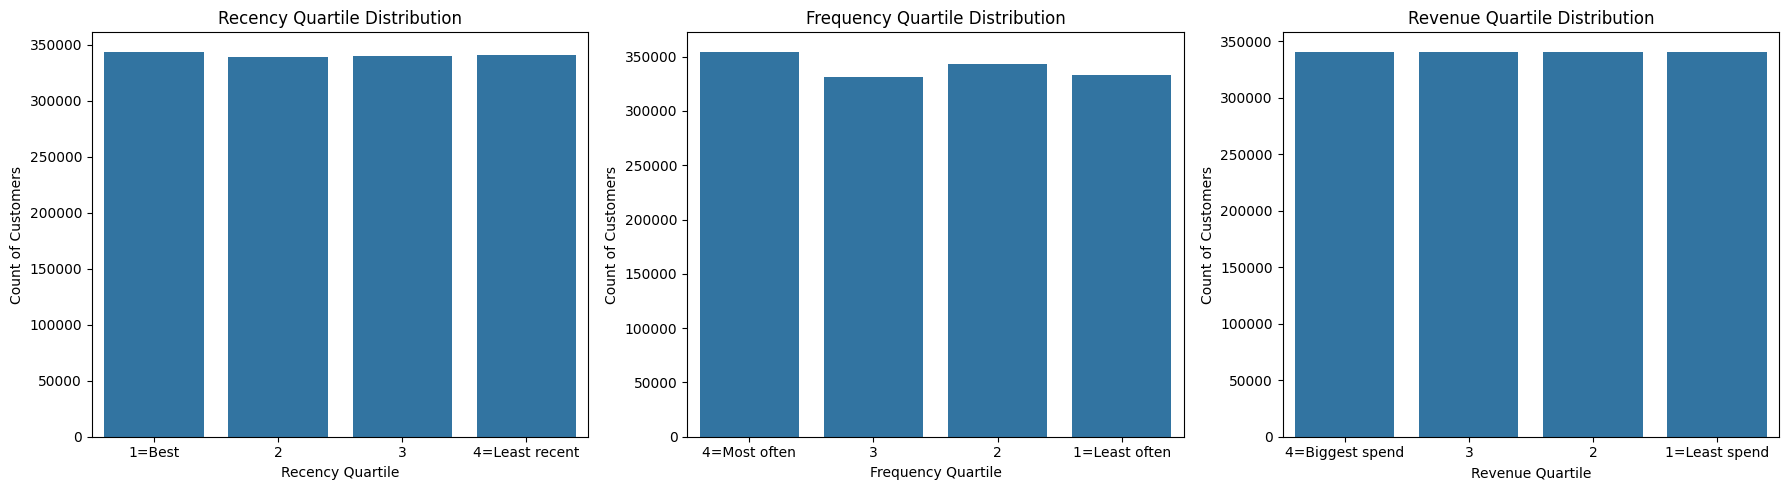

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency quartile distribution
sns.countplot(x='recency_quartile', data=rfm, order=['1=Best','2','3','4=Least recent'], ax=axes[0])
axes[0].set_title('Recency Quartile Distribution')
axes[0].set_xlabel('Recency Quartile')
axes[0].set_ylabel('Count of Customers')

# Frequency quartile distribution
sns.countplot(x='frequency_quartile', data=rfm, order=['4=Most often','3','2','1=Least often'], ax=axes[1])
axes[1].set_title('Frequency Quartile Distribution')
axes[1].set_xlabel('Frequency Quartile')
axes[1].set_ylabel('Count of Customers')

# Monetary quartile distribution
sns.countplot(x='revenue_quartile', data=rfm, order=['4=Biggest spend','3','2','1=Least spend'], ax=axes[2])
axes[2].set_title('Revenue Quartile Distribution')
axes[2].set_xlabel('Revenue Quartile')
axes[2].set_ylabel('Count of Customers')

plt.tight_layout()
plt.show()


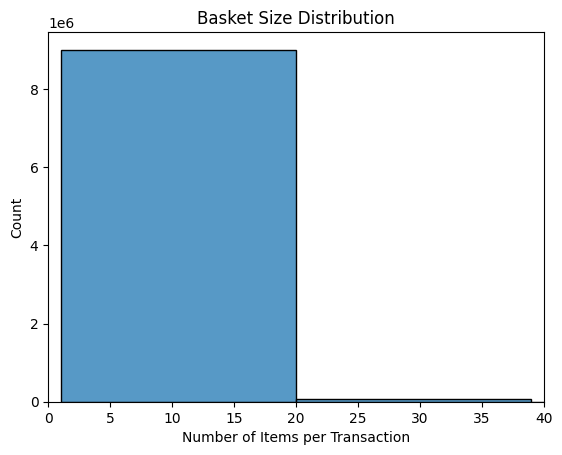

In [31]:
# Average basket size and items per purchase:
basket_sizes = transactions.groupby(['customer_id', 't_dat']).size()
sns.histplot(basket_sizes, bins=30)
plt.title('Basket Size Distribution')
plt.xlabel('Number of Items per Transaction')
plt.xlim(0, 40)  
plt.show()


In [29]:
basket_sizes

customer_id                                                       t_dat     
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657  2018-12-27    3
                                                                  2019-05-02    1
                                                                  2019-05-25    2
                                                                  2019-07-25    2
                                                                  2019-09-18    1
                                                                               ..
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a  2020-04-05    3
                                                                  2020-04-09    2
                                                                  2020-04-25    1
                                                                  2020-06-22    1
ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241  2019-12-04    1
Length: 9080179, dtyp

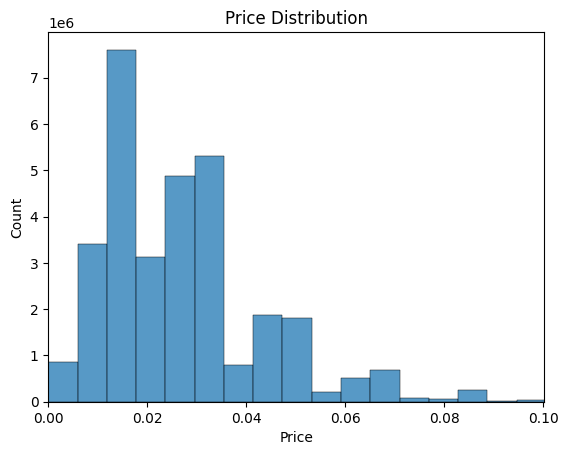

In [34]:
# Price stats
sns.histplot(transactions['price'], bins=100)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.xlim(0, transactions['price'].quantile(0.99))
plt.show()

## ARTICLES

In [32]:
# Top selling products
top_articles = transactions['article_id'].value_counts().head(10)
print(articles[articles['article_id'].isin(top_articles.index)])

       article_id  product_code                 prod_name  product_type_no  \
1713    372860001        372860        7p Basic Shaftless              302   
1714    372860002        372860        7p Basic Shaftless              302   
2236    399223001        399223   Curvy Jeggings HW Ankle              272   
3711    464297007        464297  Greta Thong Mynta Low 3p              286   
24836   610776001        610776                 Tilly (1)              255   
24837   610776002        610776                 Tilly (1)              255   
53892   706016001        706016  Jade HW Skinny Denim TRS              272   
53893   706016002        706016  Jade HW Skinny Denim TRS              272   
53894   706016003        706016  Jade HW Skinny Denim TRS              272   
70221   759871002        759871                Tilda tank              253   

      product_type_name  product_group_name  graphical_appearance_no  \
1713              Socks      Socks & Tights                  1010016 

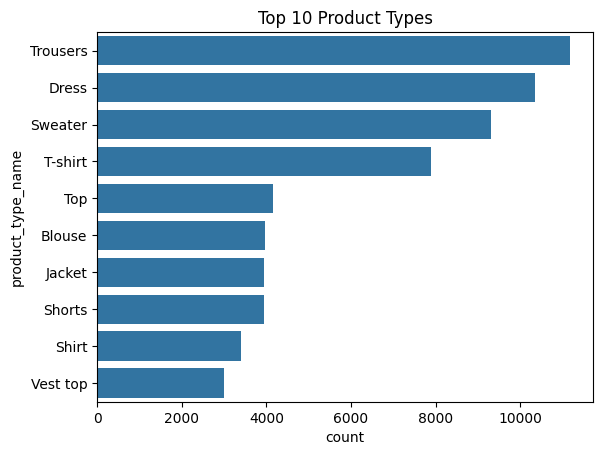

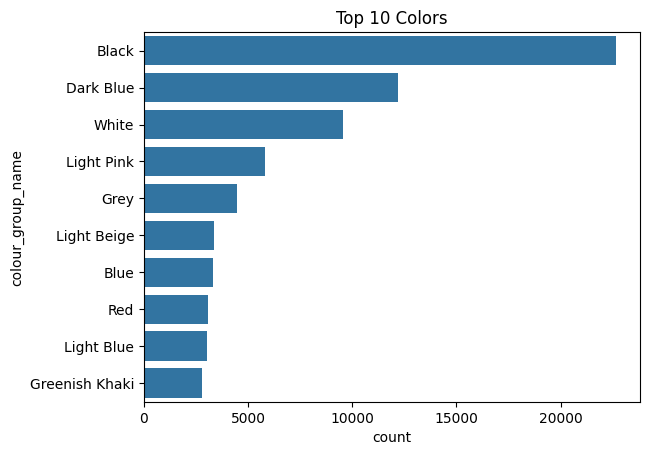

In [33]:
# Top 10 : product type and color distribution

sns.countplot(y=articles['product_type_name'],
              order=articles['product_type_name'].value_counts().index[:10])
plt.title('Top 10 Product Types')
plt.show()

sns.countplot(y=articles['colour_group_name'],
              order=articles['colour_group_name'].value_counts().index[:10])
plt.title('Top 10 Colors')
plt.show()


## CUSTOMERS 

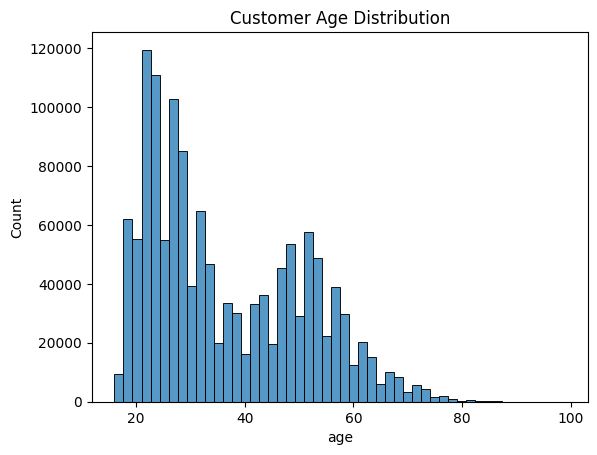

In [36]:
# Customer age distribution
sns.histplot(customers['age'].dropna(), bins=50)
plt.title('Customer Age Distribution')
plt.show()

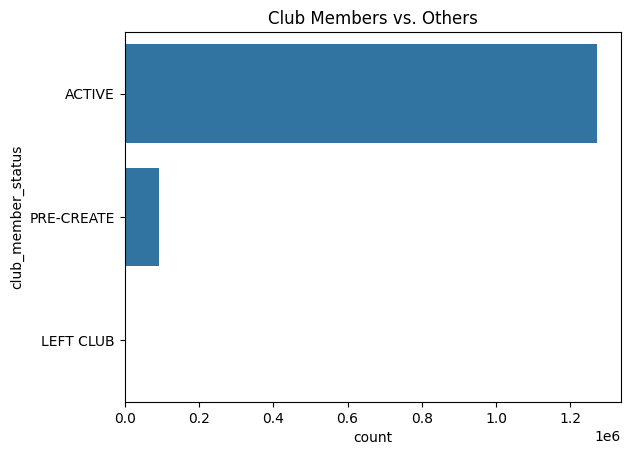

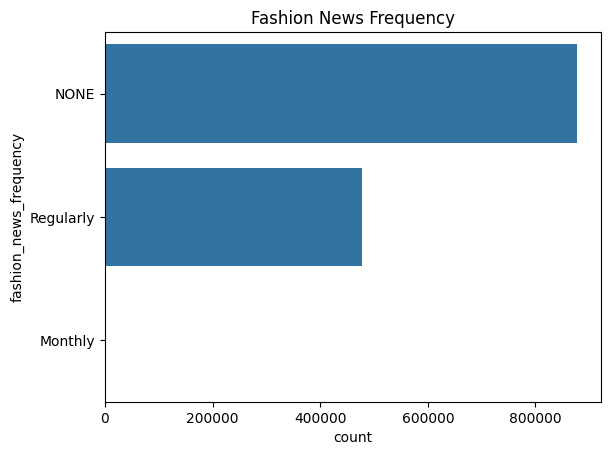

In [37]:
# Club membership and fashion news frequency 

sns.countplot(y=customers['club_member_status'])
plt.title('Club Members vs. Others')
plt.show()

sns.countplot(y=customers['fashion_news_frequency'])
plt.title('Fashion News Frequency')
plt.show()


## Merging data for some joint EDA

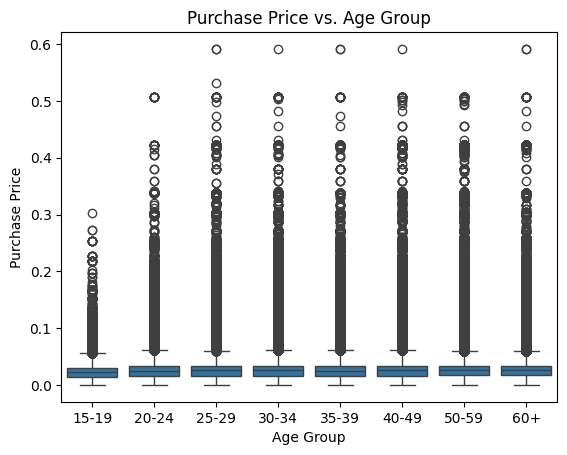

In [39]:
# Customer purchase patterns by age 

merged = transactions.merge(customers, on='customer_id', how='left')
# Bin ages into groups (e.g., 15-20, 21-25, ...)
age_bins = [15, 20, 25, 30, 35, 40, 50, 60, 90]
age_labels = ['15-19','20-24','25-29','30-34','35-39','40-49','50-59','60+']
merged['age_group'] = pd.cut(merged['age'], bins=age_bins, labels=age_labels, right=False)

# Boxplot by age group
sns.boxplot(x='age_group', y='price', data=merged)
plt.title('Purchase Price vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Price')
plt.show()


In [40]:
# Top customers & item repeats

top_customers = transactions['customer_id'].value_counts().head(10)
print('Top 10 Customers:\n', top_customers)

repeat_items = transactions.groupby(['customer_id', 'article_id']).size().reset_index(name='count')
repeat_items = repeat_items[repeat_items['count'] > 1]
print('Repeat purchases:\n', repeat_items.head())


Top 10 Customers:
 customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: count, dtype: int64
Repeat purchases:
                                           customer_id  article_id  count
1   00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   568601006      2
13  00000dbacae5abe5e23885899a1fa44253a17956c6d1

In [41]:
repeat_items

,customer_id,article_id,count
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006,2
13,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,797065001,2
19,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,351484002,3
26,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,583558001,2
27,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,590928022,2
...,...,...,...
27306394,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,484398001,2
27306399,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,570004009,2
27306406,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,622240002,2
27306414,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,680912017,2


In [43]:
# Seeing product affinity by finding items that are frequently bought together.
# Transactions grouped into baskets
baskets = transactions.groupby(['customer_id', 't_dat'])['article_id'].apply(list)

# Example: Count appearance of pairs (expensive for all, try on a sample)
from collections import Counter
from itertools import combinations
counter = Counter()
sample_baskets = baskets.sample(10000, random_state=42)
for basket in sample_baskets:
    counter.update(combinations(set(basket), 2))
print(counter.most_common(10))

[((684209027, 688537021), 8), ((689109003, 692930003), 7), ((759871001, 759871002), 7), ((559630026, 599580055), 7), ((684209001, 599580020), 6), ((684340001, 684341001), 6), ((733936001, 733935001), 5), ((749699001, 749699002), 5), ((736530007, 736531006), 5), ((240561001, 111593001), 5)]


In [44]:
# Outlier detection

# Prices
outlier_prices = transactions[transactions['price'] > transactions['price'].quantile(0.99)]
print(outlier_prices.head())

         t_dat                                        customer_id  article_id  \
53  2018-09-20  00228762ecff5b8d1ea6a2e52b96dafa198febddbc3bf3...   688545001   
168 2018-09-20  00d781e94d9a533dceb85a8d50a898d5987ad9921ea8c6...   568858001   
266 2018-09-20  016d8f0519d9e0572b3abebeab87408bad7a5c3a284016...   527687006   
276 2018-09-20  01887181e59ebbbcda75875d5df516d0ffaa26581ffd78...   672590001   
340 2018-09-20  01e9439a70175b81a0fcfe7c066a23890a57ca97b9b6d4...   687169001   

        price  sales_channel_id  week year_month  month  
53   0.134237                 2    38    2018-09      9  
168  0.118627                 2    38    2018-09      9  
266  0.101678                 1    38    2018-09      9  
276  0.101678                 1    38    2018-09      9  
340  0.118627                 2    38    2018-09      9  
